# Explorando as taxas de desemprego nos Estados Unidos e sua relação com a Educação

## Introdução
![imagem](https://images.unsplash.com/photo-1434030216411-0b793f4b4173?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=1170&q=80)
Imagem por Green Chameleon, em [Unsplash](https://unsplash.com/photos/s9CC2SKySJM).


#### Projeto desenvolvido durante a Disciplina "Análise de Dados", do curso de Pós-graduação em Visão Computacional, no CIn-UFPE.

#### Autor: Michel de Araújo

Neste projeto iremos realizar uma análise exploratória no data set "USA Unemployment & Education Level", fornecido pelo [Kaggle](https://www.kaggle.com/valbauman/student-engagement-online-learning-supplement) e originalmente retirado do [Departamento de agricultura dos Estados Unidos](https://www.ers.usda.gov/data-products/county-level-data-sets/). Este dataset contém dados sobre a taxa de desemprego e nível educacional de adultos em diversos estados do Estados Unidos. As localidades estão bem distribuidas, com informações como Município, Cidade, Subúrbio, Centro ou Rural. Os dados datam deste o ano 2000 até o ano 2020. Este dataset consiste de três arquivos do tipo CSV que mostram diferentes informações sobre o contexto.

## Bibliotecas
Começamos importando todas as bibliotecas que serão utilizadas neste projeto

In [1]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Configurando a quantidade de colunas para mostrar no Pandas
pd.set_option('display.max_columns', 500)

## Os dados

Começamos a análise importando e conhecendo o formato dos dados e os tipos de informações que eles possuem

In [2]:
educacao = pd.read_csv('education.csv')
educacao.head()

,FIPS Code,State,Area name,2003 Rural-urban Continuum Code,2003 Urban Influence Code,2013 Rural-urban Continuum Code,2013 Urban Influence Code,City/Suburb/Town/Rural 2013,"Less than a high school diploma, 1970","High school diploma only, 1970","Some college (1-3 years), 1970","Four years of college or higher, 1970","Percent of adults with less than a high school diploma, 1970","Percent of adults with a high school diploma only, 1970","Percent of adults completing some college (1-3 years), 1970","Percent of adults completing four years of college or higher, 1970","Less than a high school diploma, 1980","High school diploma only, 1980","Some college (1-3 years), 1980","Four years of college or higher, 1980","Percent of adults with less than a high school diploma, 1980","Percent of adults with a high school diploma only, 1980","Percent of adults completing some college (1-3 years), 1980","Percent of adults completing four years of college or higher, 1980","Less than a high school diploma, 1990","High school diploma only, 1990","Some college or associate's degree, 1990","Bachelor's degree or higher, 1990","Percent of adults with less than a high school diploma, 1990","Percent of adults with a high school diploma only, 1990","Percent of adults completing some college or associate's degree, 1990","Percent of adults with a bachelor's degree or higher, 1990","Less than a high school diploma, 2000","High school diploma only, 2000","Some college or associate's degree, 2000","Bachelor's degree or higher, 2000","Percent of adults with less than a high school diploma, 2000","Percent of adults with a high school diploma only, 2000","Percent of adults completing some college or associate's degree, 2000","Percent of adults with a bachelor's degree or higher, 2000","Less than a high school diploma, 2015-19","High school diploma only, 2015-19","Some college or associate's degree, 2015-19","Bachelor's degree or higher, 2015-19","Percent of adults with less than a high school diploma, 2015-19","Percent of adults with a high school diploma only, 2015-19","Percent of adults completing some college or associate's degree, 2015-19","Percent of adults with a bachelor's degree or higher, 2015-19"
0,1007,AL,Bibb County,1.0,1.0,1.0,1.0,City,"5,272","1,402",238,302,73.1,19.4,3.3,4.2,"5,254","2,611",536,433,59.5,29.6,6.1,4.9,"4,850","3,407","1,332",476,48.2,33.8,13.2,4.7,"4,984","4,838","2,756",962,36.8,35.7,20.4,7.1,"3,386","7,256","3,848","1,678",20.9,44.9,23.8,10.4
1,1009,AL,Blount County,1.0,1.0,1.0,1.0,City,"10,677","3,440",626,404,70.5,22.7,4.1,2.7,"11,666","7,011","1,819","1,144",53.9,32.4,8.4,5.3,"9,960","8,763","4,745","1,773",39.5,34.7,18.8,7.0,"9,960","12,136","8,371","3,235",29.6,36.0,24.8,9.6,"7,763","13,299","13,519","5,210",19.5,33.4,34.0,13.1
2,1021,AL,Chilton County,1.0,1.0,1.0,1.0,City,"10,285","2,805",538,415,73.2,20.0,3.8,3.0,"9,678","5,578","1,518","1,158",54.0,31.1,8.5,6.5,"9,023","6,770","3,438","1,550",43.4,32.6,16.5,7.5,"8,757","9,264","5,307","2,574",33.8,35.8,20.5,9.9,"5,474","13,348","7,401","3,823",18.2,44.4,24.6,12.7
3,1073,AL,Jefferson County,1.0,1.0,1.0,1.0,City,"186,882","101,656","32,182","33,827",52.7,28.7,9.1,9.5,"141,531","132,921","63,342","63,229",35.3,33.1,15.8,15.8,"111,325","120,393","109,272","84,718",26.2,28.3,25.7,19.9,"82,950","121,233","123,142","106,833",19.1,27.9,28.4,24.6,"44,684","118,636","136,299","150,124",9.9,26.4,30.3,33.4
4,1115,AL,St. Clair County,1.0,1.0,1.0,1.0,City,"10,304","3,540",666,471,68.8,23.6,4.4,3.1,"11,841","7,947","2,335","1,519",50.1,33.6,9.9,6.4,"12,450","10,492","6,271","2,708",39.0,32.9,19.6,8.5,"12,353","14,921","11,036","4,791",28.7,34.6,25.6,11.1,"9,488","21,849","20,207","9,880",15.4,35.6,32.9,16.1


Podemos perceber que as colunas possuem nomes longos e explicativos. Isso pode ser bom para conhecermos o dataset mas pode se tornar ruim na hora de realizar as manipulações.

In [3]:
educacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3283 entries, 0 to 3282
Data columns (total 48 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   FIPS Code                                                                 3283 non-null   int64  
 1   State                                                                     3283 non-null   object 
 2   Area name                                                                 3283 non-null   object 
 3   2003 Rural-urban Continuum Code                                           3221 non-null   float64
 4   2003 Urban Influence Code                                                 3221 non-null   float64
 5   2013 Rural-urban Continuum Code                                           3221 non-null   float64
 6   2013 Urban Influence Code                                       

Como o nome sugere, este arquivo nos fornece informações relacionadas ao nível educacional dos cidadões Americanos ao longo do tempo. As linhas representam as diferentes localidades, enquanto que as colunas representam os diferentes índices e diferentes anos. Os anos estão descritos em intervalos [1970, 1980, 1990, 2000, 2015-2019].

Perceba também que existe uma pequena quantidade de dados nulos na maioria das colunas, e uma quantidade um pouco maior nas colunas refentes aos anos 70.

Agora vamos ver o que o arquivo "unemployment.csv" tem a mostrar.

In [4]:
desemprego = pd.read_csv('unemployment.csv')
desemprego.head()

,FIPS_Code,State,Area_name,Rural_urban_continuum_code_2013,Urban_influence_code_2013,City/Suburb/Town/Rural,Metro_2013,Civilian_labor_force_2000,Employed_2000,Unemployed_2000,Unemployment_rate_2000,Civilian_labor_force_2001,Employed_2001,Unemployed_2001,Unemployment_rate_2001,Civilian_labor_force_2002,Employed_2002,Unemployed_2002,Unemployment_rate_2002,Civilian_labor_force_2003,Employed_2003,Unemployed_2003,Unemployment_rate_2003,Civilian_labor_force_2004,Employed_2004,Unemployed_2004,Unemployment_rate_2004,Civilian_labor_force_2005,Employed_2005,Unemployed_2005,Unemployment_rate_2005,Civilian_labor_force_2006,Employed_2006,Unemployed_2006,Unemployment_rate_2006,Civilian_labor_force_2007,Employed_2007,Unemployed_2007,Unemployment_rate_2007,Civilian_labor_force_2008,Employed_2008,Unemployed_2008,Unemployment_rate_2008,Civilian_labor_force_2009,Employed_2009,Unemployed_2009,Unemployment_rate_2009,Civilian_labor_force_2010,Employed_2010,Unemployed_2010,Unemployment_rate_2010,Civilian_labor_force_2011,Employed_2011,Unemployed_2011,Unemployment_rate_2011,Civilian_labor_force_2012,Employed_2012,Unemployed_2012,Unemployment_rate_2012,Civilian_labor_force_2013,Employed_2013,Unemployed_2013,Unemployment_rate_2013,Civilian_labor_force_2014,Employed_2014,Unemployed_2014,Unemployment_rate_2014,Civilian_labor_force_2015,Employed_2015,Unemployed_2015,Unemployment_rate_2015,Civilian_labor_force_2016,Employed_2016,Unemployed_2016,Unemployment_rate_2016,Civilian_labor_force_2017,Employed_2017,Unemployed_2017,Unemployment_rate_2017,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Civilian_labor_force_2019,Employed_2019,Unemployed_2019,Unemployment_rate_2019,Civilian_labor_force_2020,Employed_2020,Unemployed_2020,Unemployment_rate_2020,Median_Household_Income_2019,Med_HH_Income_Percent_of_State_Total_2019
0,1007,AL,"Bibb County, AL",1.0,1.0,City,1.0,"8,623","8,160",463,5.4,"9,134","8,513",621,6.8,"8,961","8,333",628,7.0,"8,871","8,346",525,5.9,"8,851","8,375",476,5.4,"8,837","8,444",393,4.4,"8,858","8,489",369,4.2,"8,810","8,443",367,4.2,"8,751","8,225",526,6.0,"8,696","7,637","1,059",12.2,"8,936","7,931","1,005",11.2,"8,932","8,000",932,10.4,"8,808","8,037",771,8.8,"8,699","8,000",699,8.0,"8,573","7,959",614,7.2,"8,552","7,983",569,6.7,"8,539","7,986",553,6.5,"8,527","8,142",385,4.5,"8,569","8,229",340,4.0,"8,639","8,371",268,3.1,"8,640","8,067",573,6.6,"47,918",92.6
1,1009,AL,"Blount County, AL",1.0,1.0,City,1.0,"25,266","24,375",891,3.5,"25,450","24,521",929,3.7,"25,836","24,436","1,400",5.4,"26,008","24,812","1,196",4.6,"26,237","25,149","1,088",4.1,"26,378","25,434",944,3.6,"26,799","25,939",860,3.2,"26,683","25,816",867,3.2,"26,693","25,405","1,288",4.8,"26,426","24,005","2,421",9.2,"24,928","22,509","2,419",9.7,"25,124","22,951","2,173",8.6,"24,978","23,216","1,762",7.1,"24,860","23,277","1,583",6.4,"24,571","23,074","1,497",6.1,"24,416","23,089","1,327",5.4,"24,380","23,061","1,319",5.4,"24,656","23,631","1,025",4.2,"24,960","24,086",874,3.5,"25,196","24,516",680,2.7,"24,661","23,653","1,008",4.1,"52,902",102.2
2,1021,AL,"Chilton County, AL",1.0,1.0,City,1.0,"19,601","18,752",849,4.3,"19,580","18,631",949,4.8,"19,452","18,456",996,5.1,"19,557","18,581",976,5.0,"19,650","18,738",912,4.6,"19,623","18,859",764,3.9,"19,792","19,087",705,3.6,"19,777","19,093",684,3.5,"19,609","18,583","1,026",5.2,"19,393","17,501","1,892",9.8,"19,474","17,502","1,972",10.1,"19,536","17,761","1,775",9.1,"19,396","17,960","1,436",7.4,"19,339","18,052","1,287",6.7,"19,130","17,938","1,192",6.2,"19,089","18,005","1,084",5.7,"19,029","17,982","1,047",5.5,"19,203","18,396",807,4.2,"19,538","18,834",704,3.6,"19,841","19,296",545,2.7,"19,592","18,618",974,5.0,"49,692",96.0
3,1073,AL,"Jefferson County, AL",1.0,1.0,City,1.0,"331,141","317,868","13,273",4.0,"327,780","313,445","14,335",4.4,"323,104","306,259","16,845",5.2,"322,328","304,626","17,702",5.5,"320,629","303,868","16,761",5.2,"316,522","302,586","13,936",4.4,"317,080","304,463",

Já este arquivo está com as colunas com a nomenclatura mais correta.

In [5]:
desemprego.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3275 entries, 0 to 3274
Data columns (total 93 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   FIPS_Code                                  3275 non-null   int64  
 1   State                                      3275 non-null   object 
 2   Area_name                                  3275 non-null   object 
 3   Rural_urban_continuum_code_2013            3219 non-null   float64
 4   Urban_influence_code_2013                  3219 non-null   float64
 5   City/Suburb/Town/Rural                     3219 non-null   object 
 6   Metro_2013                                 3222 non-null   float64
 7   Civilian_labor_force_2000                  3270 non-null   object 
 8   Employed_2000                              3270 non-null   object 
 9   Unemployed_2000                            3270 non-null   object 
 10  Unemployment_rate_2000  

Este arquivo nos traz informações sobre o desemprego nos municípios. Os diferentemente do dataset anterior, aqui os dados aqui são anuais e mostram: 

1) A quantidade de pessoas aptas à trabalhar (Civilian_labor_force); 

2) A quantidade de pessoas empregadas (Employed);

3) A quantidade de pessoas desempregadas (Unemployment);

4) A porcentagem de pessoas desempregadas, ou seja, a taxa de desemprego (Unemployment_rate).

Agora vamos partir para a próxima seção: Pré-processamento

## Pré-processamento
Existem algumas colunas em ambos os datasets que não irão nos fornecer informações relevantes, como "Median_Household_income", pois este dado só existe para o ano de 2020, no dataset de desemprego, assim como as colunas "Urban_continum_code" em ambos os datasets. Dessa forma, iremos remover estas colunas.

### Educação
Primeiro vamos tratar os dados relativos aos níveis educacionais.

In [6]:
educacao = educacao.drop(["2003 Rural-urban Continuum Code",
                         "2003 Urban Influence Code",
                         "2013 Rural-urban Continuum Code",
                         "2013 Urban Influence Code"],
                        axis=1)

In [7]:
educacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3283 entries, 0 to 3282
Data columns (total 44 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   FIPS Code                                                                 3283 non-null   int64  
 1   State                                                                     3283 non-null   object 
 2   Area name                                                                 3283 non-null   object 
 3   City/Suburb/Town/Rural 2013                                               3221 non-null   object 
 4   Less than a high school diploma, 1970                                     3186 non-null   object 
 5   High school diploma only, 1970                                            3186 non-null   object 
 6   Some college (1-3 years), 1970                                  

In [8]:
educacao.head()

,FIPS Code,State,Area name,City/Suburb/Town/Rural 2013,"Less than a high school diploma, 1970","High school diploma only, 1970","Some college (1-3 years), 1970","Four years of college or higher, 1970","Percent of adults with less than a high school diploma, 1970","Percent of adults with a high school diploma only, 1970","Percent of adults completing some college (1-3 years), 1970","Percent of adults completing four years of college or higher, 1970","Less than a high school diploma, 1980","High school diploma only, 1980","Some college (1-3 years), 1980","Four years of college or higher, 1980","Percent of adults with less than a high school diploma, 1980","Percent of adults with a high school diploma only, 1980","Percent of adults completing some college (1-3 years), 1980","Percent of adults completing four years of college or higher, 1980","Less than a high school diploma, 1990","High school diploma only, 1990","Some college or associate's degree, 1990","Bachelor's degree or higher, 1990","Percent of adults with less than a high school diploma, 1990","Percent of adults with a high school diploma only, 1990","Percent of adults completing some college or associate's degree, 1990","Percent of adults with a bachelor's degree or higher, 1990","Less than a high school diploma, 2000","High school diploma only, 2000","Some college or associate's degree, 2000","Bachelor's degree or higher, 2000","Percent of adults with less than a high school diploma, 2000","Percent of adults with a high school diploma only, 2000","Percent of adults completing some college or associate's degree, 2000","Percent of adults with a bachelor's degree or higher, 2000","Less than a high school diploma, 2015-19","High school diploma only, 2015-19","Some college or associate's degree, 2015-19","Bachelor's degree or higher, 2015-19","Percent of adults with less than a high school diploma, 2015-19","Percent of adults with a high school diploma only, 2015-19","Percent of adults completing some college or associate's degree, 2015-19","Percent of adults with a bachelor's degree or higher, 2015-19"
0,1007,AL,Bibb County,City,"5,272","1,402",238,302,73.1,19.4,3.3,4.2,"5,254","2,611",536,433,59.5,29.6,6.1,4.9,"4,850","3,407","1,332",476,48.2,33.8,13.2,4.7,"4,984","4,838","2,756",962,36.8,35.7,20.4,7.1,"3,386","7,256","3,848","1,678",20.9,44.9,23.8,10.4
1,1009,AL,Blount County,City,"10,677","3,440",626,404,70.5,22.7,4.1,2.7,"11,666","7,011","1,819","1,144",53.9,32.4,8.4,5.3,"9,960","8,763","4,745","1,773",39.5,34.7,18.8,7.0,"9,960","12,136","8,371","3,235",29.6,36.0,24.8,9.6,"7,763","13,299","13,519","5,210",19.5,33.4,34.0,13.1
2,1021,AL,Chilton County,City,"10,285","2,805",538,415,73.2,20.0,3.8,3.0,"9,678","5,578","1,518","1,158",54.0,31.1,8.5,6.5,"9,023","6,770","3,438","1,550",43.4,32.6,16.5,7.5,"8,757","9,264","5,307","2,574",33.8,35.8,20.5,9.9,"5,474","13,348","7,401","3,823",18.2,44.4,24.6,12.7
3,1073,AL,Jefferson County,City,"186,882","101,656","32,182","33,827",52.7,28.7,9.1,9.5,"141,531","132,921","63,342","63,229",35.3,33.1,15.8,15.8,"111,325","120,393","109,272","84,718",26.2,28.3,25.7,19.9,"82,950","121,233","123,142","106,833",19.1,27.9,28.4,24.6,"44,684","118,636","136,299","150,124",9.9,26.4,30.3,33.4
4,1115,AL,St. Clair County,City,"10,304","3,540",666,471,68.8,23.6,4.4,3.1,"11,841","7,947","2,335","1,519",50.1,33.6,9.9,6.4,"12,450","10,492","6,271","2,708",39.0,32.9,19.6,8.5,"12,353","14,921","11,036","4,791",28.7,34.6,25.6,11.1,"9,488","21,849","20,207","9,880",15.4,35.6,32.9,16.1


A primeira coisa de podemos fazer para melhorar a estrutura deste DataFrame é transformá-lo do formado largo para longo. Assim, ficará muito mais intuitivo e simples de manipular e fazer gráficos. Para fazer isto, irei utilizar a função melt() do próprio pandas. Esta função reune todas as colunas não informadas como argumento e as transforma em forma de linhas de uma única coluna, enquanto que os outros valores serão redistribuídos e duplicados.

In [9]:
educacao = pd.melt(educacao, id_vars=["FIPS Code", "State", "Area name", "City/Suburb/Town/Rural 2013"])
educacao.head()

,FIPS Code,State,Area name,City/Suburb/Town/Rural 2013,variable,value
0,1007,AL,Bibb County,City,"Less than a high school diploma, 1970","5,272"
1,1009,AL,Blount County,City,"Less than a high school diploma, 1970","10,677"
2,1021,AL,Chilton County,City,"Less than a high school diploma, 1970","10,285"
3,1073,AL,Jefferson County,City,"Less than a high school diploma, 1970","186,882"
4,1115,AL,St. Clair County,City,"Less than a high school diploma, 1970","10,304"


In [10]:
# Verificando se todas as colunas foram incluidas na coluna variable 
educacao.variable.unique()

array(['Less than a high school diploma, 1970',
       'High school diploma only, 1970', 'Some college (1-3 years), 1970',
       'Four years of college or higher, 1970',
       'Percent of adults with less than a high school diploma, 1970',
       'Percent of adults with a high school diploma only, 1970',
       'Percent of adults completing some college (1-3 years), 1970',
       'Percent of adults completing four years of college or higher, 1970',
       'Less than a high school diploma, 1980',
       'High school diploma only, 1980', 'Some college (1-3 years), 1980',
       'Four years of college or higher, 1980',
       'Percent of adults with less than a high school diploma, 1980',
       'Percent of adults with a high school diploma only, 1980',
       'Percent of adults completing some college (1-3 years), 1980',
       'Percent of adults completing four years of college or higher, 1980',
       'Less than a high school diploma, 1990',
       'High school diploma only, 1990',
 

Deu certo. Agora o próximo passo é separar as variáveis dos anos, criando uma coluna separadada para descrever o ano informado dos dados. Para fazer isto, basta usar o método df.column.str.split()

In [11]:
educacao[['variavel', 'ano']] = educacao.variable.str.split(', ', expand=True)
educacao = educacao.drop('variable', axis=1)

In [12]:
educacao.head()

,FIPS Code,State,Area name,City/Suburb/Town/Rural 2013,value,variavel,ano
0,1007,AL,Bibb County,City,"5,272",Less than a high school diploma,1970
1,1009,AL,Blount County,City,"10,677",Less than a high school diploma,1970
2,1021,AL,Chilton County,City,"10,285",Less than a high school diploma,1970
3,1073,AL,Jefferson County,City,"186,882",Less than a high school diploma,1970
4,1115,AL,St. Clair County,City,"10,304",Less than a high school diploma,1970


Agora precisamos tratar a coluna "value", que possui valores do tipo str que deveria ser inteiros.

In [13]:
def mudar_tipo(row):
    if type(row) == str:
        return float(row.replace(',', ''))
    else:
        return row

In [14]:
educacao['value'] = educacao['value'].apply(mudar_tipo)

In [15]:
# Verificando os tipos
educacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131320 entries, 0 to 131319
Data columns (total 7 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   FIPS Code                    131320 non-null  int64  
 1   State                        131320 non-null  object 
 2   Area name                    131320 non-null  object 
 3   City/Suburb/Town/Rural 2013  128840 non-null  object 
 4   value                        130151 non-null  float64
 5   variavel                     131320 non-null  object 
 6   ano                          131320 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 7.0+ MB


Agora precisamos tratar a coluna "ano". A partir do ano de 2015 temos uma str "2015-19". Como sabemos que se trata de 2015 a 2019, vamos substuir por 2015.

In [16]:
educacao['ano'] = educacao.ano.apply(lambda x: x.replace("2015-19", '2015'))
educacao['ano'] = educacao.ano.apply(lambda x: int(x))

In [17]:
educacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131320 entries, 0 to 131319
Data columns (total 7 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   FIPS Code                    131320 non-null  int64  
 1   State                        131320 non-null  object 
 2   Area name                    131320 non-null  object 
 3   City/Suburb/Town/Rural 2013  128840 non-null  object 
 4   value                        130151 non-null  float64
 5   variavel                     131320 non-null  object 
 6   ano                          131320 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 7.0+ MB


In [18]:
educacao.head()

,FIPS Code,State,Area name,City/Suburb/Town/Rural 2013,value,variavel,ano
0,1007,AL,Bibb County,City,5272.0,Less than a high school diploma,1970
1,1009,AL,Blount County,City,10677.0,Less than a high school diploma,1970
2,1021,AL,Chilton County,City,10285.0,Less than a high school diploma,1970
3,1073,AL,Jefferson County,City,186882.0,Less than a high school diploma,1970
4,1115,AL,St. Clair County,City,10304.0,Less than a high school diploma,1970


### Desemprego
Agora partimos para o pré-processamento dos dados relativos ao desemprego, do arquivo "Unemployment"

In [19]:
desemprego = desemprego.drop(["Rural_urban_continuum_code_2013",
                             "Urban_influence_code_2013",
                             "Metro_2013",
                             "Median_Household_Income_2019",
                             "Med_HH_Income_Percent_of_State_Total_2019"],
                            axis=1)

In [20]:
desemprego.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3275 entries, 0 to 3274
Data columns (total 88 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   FIPS_Code                  3275 non-null   int64  
 1   State                      3275 non-null   object 
 2   Area_name                  3275 non-null   object 
 3   City/Suburb/Town/Rural     3219 non-null   object 
 4   Civilian_labor_force_2000  3270 non-null   object 
 5   Employed_2000              3270 non-null   object 
 6   Unemployed_2000            3270 non-null   object 
 7   Unemployment_rate_2000     3270 non-null   float64
 8   Civilian_labor_force_2001  3270 non-null   object 
 9   Employed_2001              3270 non-null   object 
 10  Unemployed_2001            3270 non-null   object 
 11  Unemployment_rate_2001     3270 non-null   float64
 12  Civilian_labor_force_2002  3270 non-null   object 
 13  Employed_2002              3270 non-null   objec

A primeira coisa de podemos fazer para melhorar a estrutura deste DataFrame é transformá-lo do formado largo para longo. Assim, ficará muito mais intuitivo e simples de manipular e fazer gráficos. Para fazer isto, irei utilizar a função *melt()* do próprio pandas. Esta função reune todas as colunas não informadas como argumento e as transforma em forma de linhas de uma única coluna, enquanto que os outros valores serão redistribuídos e duplicados.

In [21]:
desemprego = pd.melt(desemprego, id_vars=["FIPS_Code", "Area_name", "State", "City/Suburb/Town/Rural"])
desemprego.head()

,FIPS_Code,Area_name,State,City/Suburb/Town/Rural,variable,value
0,1007,"Bibb County, AL",AL,City,Civilian_labor_force_2000,"8,623"
1,1009,"Blount County, AL",AL,City,Civilian_labor_force_2000,"25,266"
2,1021,"Chilton County, AL",AL,City,Civilian_labor_force_2000,"19,601"
3,1073,"Jefferson County, AL",AL,City,Civilian_labor_force_2000,"331,141"
4,1115,"St. Clair County, AL",AL,City,Civilian_labor_force_2000,"31,555"


Agora temos um dataset no formato longo! Porém, ele ainda não está no formato correto. Precisamos fazer uma transformação na coluna "variable" para separar o tipo da variável (desempregados, empregados, etc.) do ano, pois queremos analisar as variáveis como colunas e o tempo separadamente.

In [22]:
# Primeiro vamos renomear algums termos da coluna "variable", para uniformizar a quantidade de "sublinhados"
desemprego.loc[:, "variable"] = desemprego["variable"].str.replace('Civilian_labor_force', 'aptosTrabalhar')
desemprego.loc[:, "variable"] = desemprego["variable"].str.replace('Unemployment_rate', 'taxaDesemprego')
desemprego.loc[:, "variable"] = desemprego["variable"].str.replace('Unemployed', 'desempregados')
desemprego.loc[:, "variable"] = desemprego["variable"].str.replace('Employed', 'empregados')

Agora podemos separar a coluna "variable" e tirar o ano da mesma.

In [23]:
desemprego[["variavel", "ano"]] = desemprego.variable.str.split('_', expand=True)

In [24]:
desemprego.head()

,FIPS_Code,Area_name,State,City/Suburb/Town/Rural,variable,value,variavel,ano
0,1007,"Bibb County, AL",AL,City,aptosTrabalhar_2000,"8,623",aptosTrabalhar,2000
1,1009,"Blount County, AL",AL,City,aptosTrabalhar_2000,"25,266",aptosTrabalhar,2000
2,1021,"Chilton County, AL",AL,City,aptosTrabalhar_2000,"19,601",aptosTrabalhar,2000
3,1073,"Jefferson County, AL",AL,City,aptosTrabalhar_2000,"331,141",aptosTrabalhar,2000
4,1115,"St. Clair County, AL",AL,City,aptosTrabalhar_2000,"31,555",aptosTrabalhar,2000


Agora vamos tratar a coluna "value", pois ela está em formato *str* e com vírgulas. Além disso, podemos remover a coluna "variable".

In [25]:
desemprego = desemprego.drop("variable", axis=1)

# Antes remover a vírgula, é necessário remover os valores nulos
print(f"Existem {sum(desemprego.value.isna())} valores nulos de um total de {len(desemprego)}")

Existem 704 valores nulos de um total de 275100


Como a quantidade de nulos é pequena em relação ao dataset inteiro, podemos remover estas linhas

In [26]:
desemprego = desemprego[desemprego.value.isna() == False]

In [27]:
# Agora podemos alterar o tipo utilizando a mesma função que criamos anteriormente

In [28]:
desemprego['value'] = desemprego.value.apply(mudar_tipo)

In [29]:
desemprego['ano'] = desemprego.ano.apply(lambda x: int(x))

In [30]:
desemprego

,FIPS_Code,Area_name,State,City/Suburb/Town/Rural,value,variavel,ano
0,1007,"Bibb County, AL",AL,City,8623.0,aptosTrabalhar,2000
1,1009,"Blount County, AL",AL,City,25266.0,aptosTrabalhar,2000
2,1021,"Chilton County, AL",AL,City,19601.0,aptosTrabalhar,2000
3,1073,"Jefferson County, AL",AL,City,331141.0,aptosTrabalhar,2000
4,1115,"St. Clair County, AL",AL,City,31555.0,aptosTrabalhar,2000
...,...,...,...,...,...,...,...
275094,51000,Virginia,VA,NaN,6.2,taxaDesemprego,2020
275095,53000,Washington,WA,NaN,8.4,taxaDesemprego,2020
275096,54000,West Virginia,WV,NaN,8.3,taxaDesemprego,2020
275097,55000,Wisconsin,WI,NaN,6.3,taxaDesemprego,2020


## Análise Exploratória
Com os dados devidamente limpos e organizados, podemos começar a análise exploratória e extrair valor dos dados

### Desemprego

Podemos começar com uma visão temporal em nível Nacional

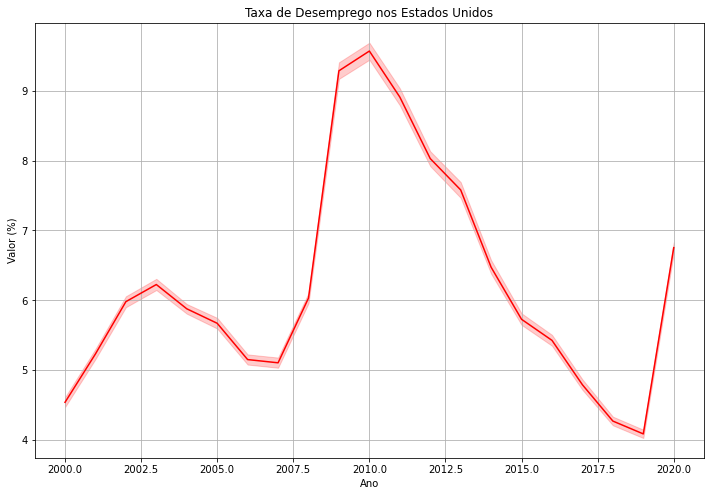

In [31]:
fig = plt.figure(figsize=(12,8))
sns.lineplot(data=desemprego[desemprego.variavel=='taxaDesemprego'],
            x='ano',
            y='value',
            color='red')

plt.xlabel('Ano')
plt.ylabel('Valor (%)')
plt.title("Taxa de Desemprego nos Estados Unidos")
plt.grid()
plt.show()

Podemos perceber que, no período observado, o ano com pior taxa de desemprego foi 2010, equanto que 2019 foi o ano com melhor taxa de desemprego. Também é possível perceber que este valor é homogêneo ao longo do país, não houvendo grande varição entre os estados.

Ao longo dos anos, como foi o crescimento da população e a taxa de desemprego?

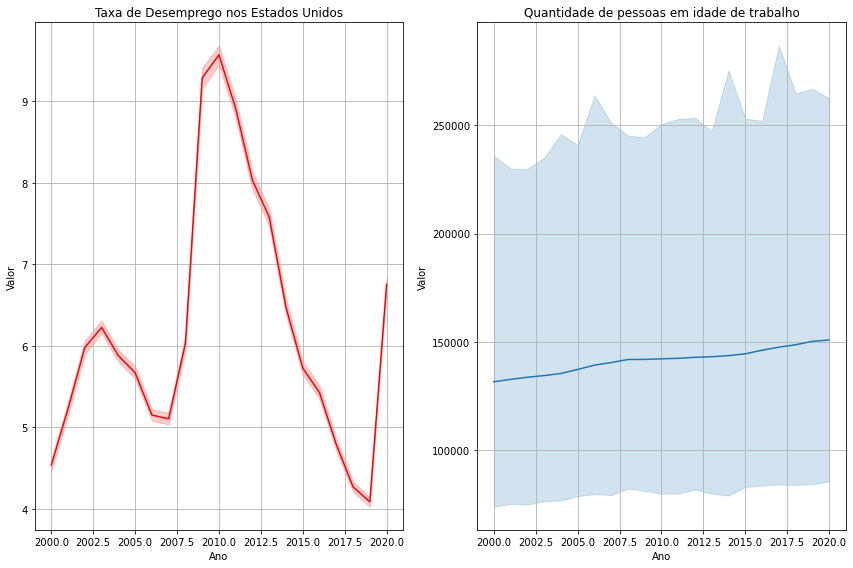

In [32]:
fig, axs = plt.subplots(1, 2, figsize=(12,8))
sns.lineplot(data=desemprego[desemprego.variavel=='taxaDesemprego'],
            x='ano',
            y='value', ax=axs[0],
            color='red')
axs[0].set_xlabel('Ano')
axs[0].set_ylabel('Valor')
axs[0].set_title("Taxa de Desemprego nos Estados Unidos")
axs[0].grid()


sns.lineplot(data=desemprego[desemprego.variavel=='aptosTrabalhar'],
            x='ano',
            y='value', ax=axs[1])

axs[1].set_xlabel('Ano')
axs[1].set_ylabel('Valor')
axs[1].set_title("Quantidade de pessoas em idade de trabalho")
axs[1].grid()
plt.tight_layout()

plt.show()

Apesar de a quantidade de pessoas áptas a trabalhar crescer quase que linearmente, a taxa de desemprego não. Isso ocorre a inúmeros fatores, como crises econômicas e etc.

Como é a taxa de desemprego média em nível estadual no período observado?

In [33]:
desemprego_estadual = desemprego.groupby(['State', 'ano', 'variavel']).mean().reset_index()
desemprego_estadual.sort_values('value', ascending=True, inplace=True)

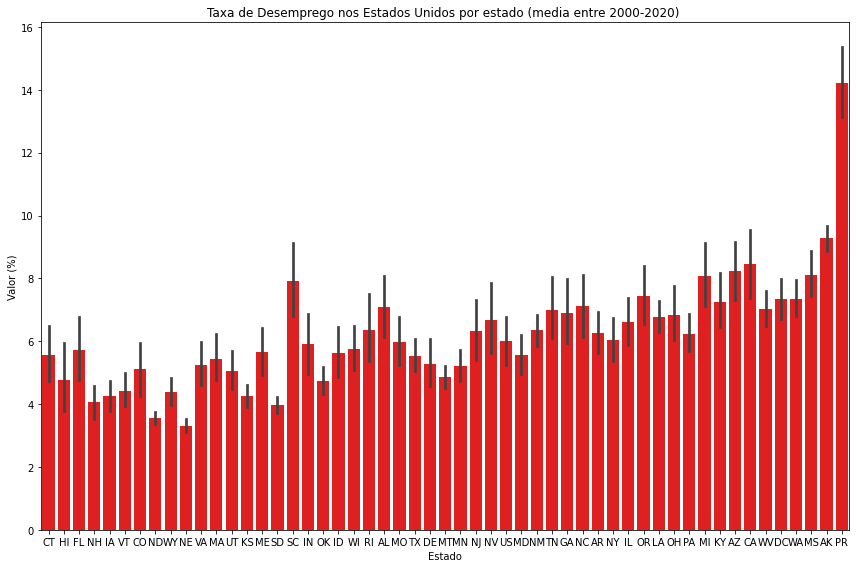

In [34]:
fig = plt.figure(figsize=(12,8))
sns.barplot(data=desemprego_estadual[desemprego_estadual.variavel=='taxaDesemprego'],
            x='State',
            y='value',
           color='red')
plt.xlabel('Estado')
plt.ylabel('Valor (%)')
plt.title("Taxa de Desemprego nos Estados Unidos por estado (media entre 2000-2020) ")
plt.tight_layout()
plt.show()

Podemos perceber que existem dois estados mais proeminentes quando se traxa da taxa de desemprego média entre 2000 e 2020,
sendo o estado de Puerto Rico o com maior taxa média, enquanto que Nebraska é o estado com menor taxa de desemprego no período registrado.

Podemos também analisar como o desemprego médio está distribuído de acordo com a zona de habitação.

In [35]:
# Extraindo a média nacional durante todo o período de 2000 a 2020
desemprego_zonas = desemprego.groupby(by=["City/Suburb/Town/Rural", "variavel"]).mean().reset_index()
desemprego_zonas = desemprego[desemprego.variavel == 'taxaDesemprego']
desemprego_zonas

,FIPS_Code,Area_name,State,City/Suburb/Town/Rural,value,variavel,ano
9825,1007,"Bibb County, AL",AL,City,5.4,taxaDesemprego,2000
9826,1009,"Blount County, AL",AL,City,3.5,taxaDesemprego,2000
9827,1021,"Chilton County, AL",AL,City,4.3,taxaDesemprego,2000
9828,1073,"Jefferson County, AL",AL,City,4.0,taxaDesemprego,2000
9829,1115,"St. Clair County, AL",AL,City,3.8,taxaDesemprego,2000
...,...,...,...,...,...,...,...
275094,51000,Virginia,VA,NaN,6.2,taxaDesemprego,2020
275095,53000,Washington,WA,NaN,8.4,taxaDesemprego,2020
275096,54000,West Virginia,WV,NaN,8.3,taxaDesemprego,2020
275097,55000,Wisconsin,WI,NaN,6.3,taxaDesemprego,2020


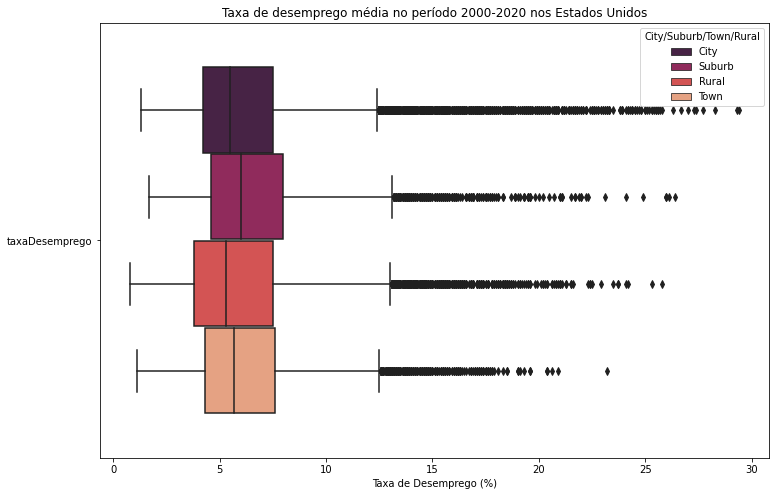

In [36]:
plt.figure(figsize=(12,8))
sns.boxplot(x='value',
           y='variavel',
            hue='City/Suburb/Town/Rural',
           data=desemprego_zonas,
           palette='rocket')

plt.xlabel("Taxa de Desemprego (%)")
plt.ylabel("")
plt.title("Taxa de desemprego média no período 2000-2020 nos Estados Unidos")


plt.show()

Podemos visualizar esta informação também através de uma tabela

In [37]:
estats = desemprego_zonas[["value"]].describe().reset_index()
estats.columns = ["Medida","Valor"]
print(estats)

  Medida         Valor
0  count  68599.000000
1   mean      6.224961
2    std      2.988224
3    min      0.800000
4    25%      4.100000
5    50%      5.500000
6    75%      7.600000
7    max     29.400000


Existem bastante outliers no dataset, visto que a 75% dos dados estão abaixo de 8% de desemprego, enquanto que o valor máximo é de 29.4% (Puerto Rico, que não é mais um estado Americano). Como esta taxa variou durante o período observado?

In [38]:
# Extraindo a média nacional, para cada ano
desemprego_zonas = desemprego.groupby(by=["City/Suburb/Town/Rural", "variavel", "ano"]).mean().reset_index()

In [39]:
desemprego_zonas

,City/Suburb/Town/Rural,variavel,ano,FIPS_Code,value
0,City,aptosTrabalhar,2000,32746.743112,99212.964344
1,City,aptosTrabalhar,2001,32746.743112,100105.551864
2,City,aptosTrabalhar,2002,32746.743112,100917.212318
3,City,aptosTrabalhar,2003,32746.743112,101495.604538
4,City,aptosTrabalhar,2004,32746.743112,102345.315235
...,...,...,...,...,...
331,Town,taxaDesemprego,2016,28850.499184,5.440457
332,Town,taxaDesemprego,2017,28850.499184,4.696574
333,Town,taxaDesemprego,2018,28850.499184,4.171289
334,Town,taxaDesemprego,2019,28850.499184,4.025612


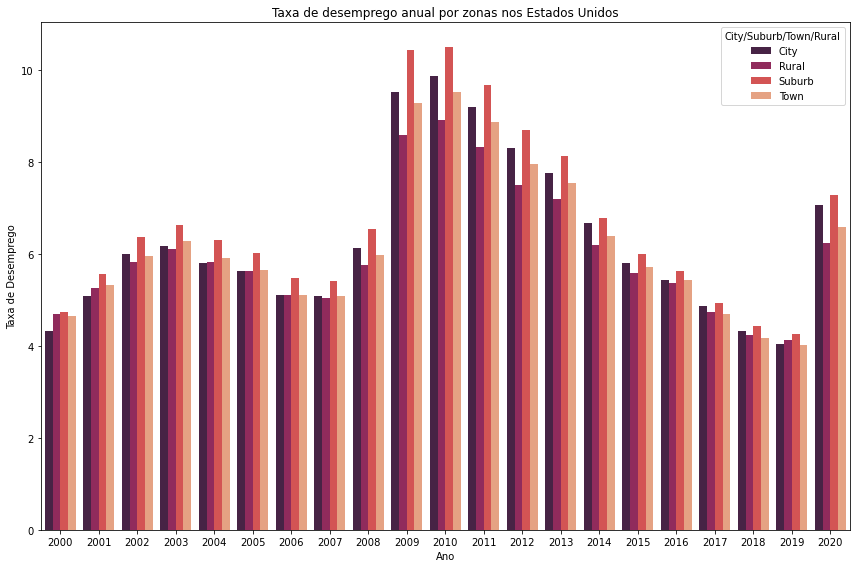

In [40]:
fig = plt.figure(figsize=(12,8))
sns.barplot(data=desemprego_zonas[desemprego_zonas.variavel == 'taxaDesemprego'],
           x='ano',
           y='value',
           hue='City/Suburb/Town/Rural',
           palette='rocket')

plt.xlabel("Ano")
plt.ylabel("Taxa de Desemprego")
plt.title("Taxa de desemprego anual por zonas nos Estados Unidos")
plt.tight_layout()
plt.show()

Podemos ver que não há discrepância entre as taxas de desemprego entre as zonas rurais e urbanas e que estes valores sempre se mantém bem próximos uns dos outros ao longo do tempo.

### Educação
Nesta seção iremos explorar os níveis educacionais nos Estados Unidos no período de 1970 a 2015.

In [41]:
educacao.variavel.unique()

array(['Less than a high school diploma', 'High school diploma only',
       'Some college (1-3 years)', 'Four years of college or higher',
       'Percent of adults with less than a high school diploma',
       'Percent of adults with a high school diploma only',
       'Percent of adults completing some college (1-3 years)',
       'Percent of adults completing four years of college or higher',
       "Some college or associate's degree",
       "Bachelor's degree or higher",
       "Percent of adults completing some college or associate's degree",
       "Percent of adults with a bachelor's degree or higher"],
      dtype=object)

Como a porcentagem de pessoas com ensino médio completo e ensino superior (bachelor's degree or higher) mudou no tempo?

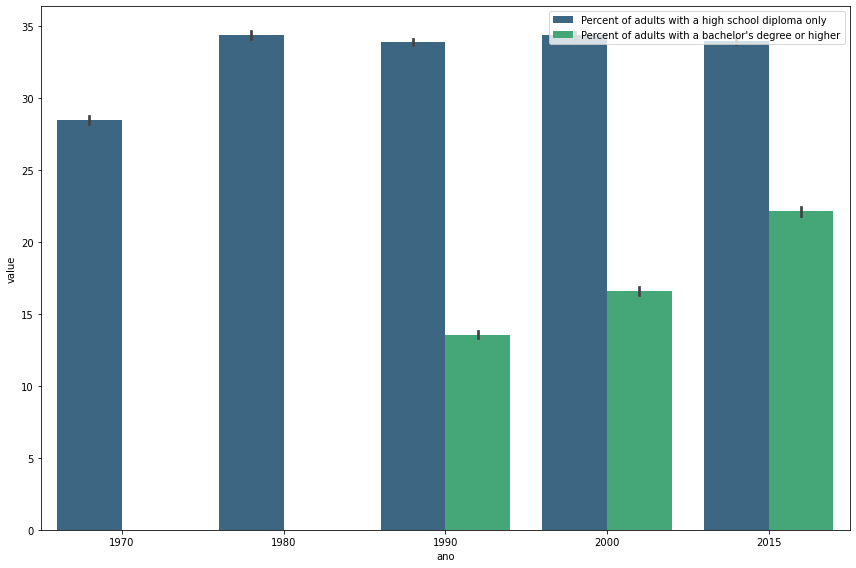

In [42]:
ensino_medio_superior = educacao[(educacao.variavel == "Percent of adults with a high school diploma only") | 
                                 (educacao.variavel == "Percent of adults with a bachelor's degree or higher")]

plt.figure(figsize=(12,8))

sns.barplot(data=ensino_medio_superior,
           x='ano',
           y='value',
           hue='variavel',
           palette='viridis')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

Vemos que a porcetagem de pessoas que possuem apenas o ensino médio não varia muito desde 1980, enquanto que a porcentagem de pessoas que possuem ensino superior cresce a cada década. Podemos perceber que a democratização do ensino superior permitiu que muito mais pessoas tivessem acesso às universidades. No entando, menos do que 25% da população registrada neste dataset possuem ensino superior, o que, considerando o total, é um número pequeno.

E as pessoas que não possuem o ensino médio?

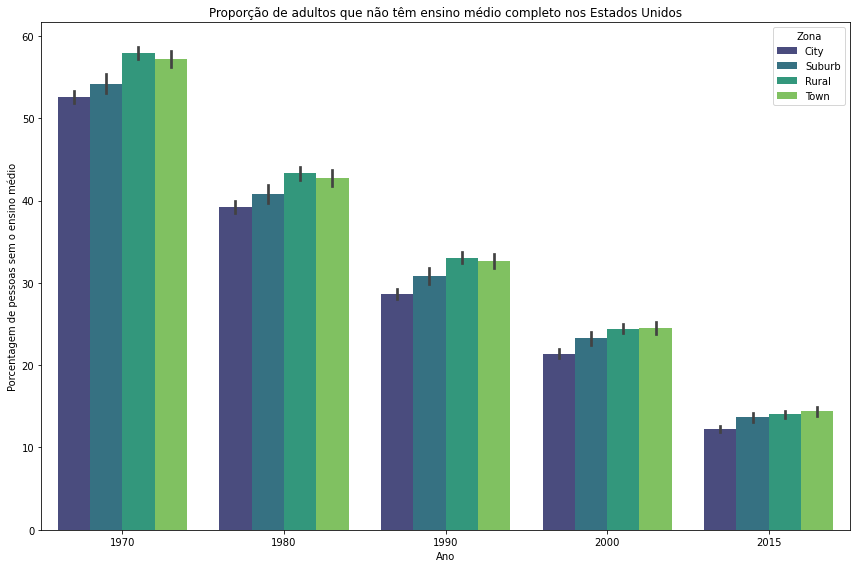

In [43]:
ensino_fundamental = educacao[(educacao.variavel == "Percent of adults with less than a high school diploma")]

plt.figure(figsize=(12,8))

sns.barplot(data=ensino_fundamental,
           x='ano',
           y='value',
           hue='City/Suburb/Town/Rural 2013',
           palette='viridis')
plt.xlabel("Ano")
plt.ylabel("Porcentagem de pessoas sem o ensino médio")
plt.title("Proporção de adultos que não têm ensino médio completo nos Estados Unidos")
plt.tight_layout()
plt.legend(title="Zona")
plt.show()

A taxa de pessoas que possuem menos do que o ensino médio vem descrescendo quase linearmente com as décadas! No início da década de 70 mais da metade da população dos Estados Unidos não tinha o ensino médio completo, enquanto que em 2015 esse valor era de aproximadamente de 15%.

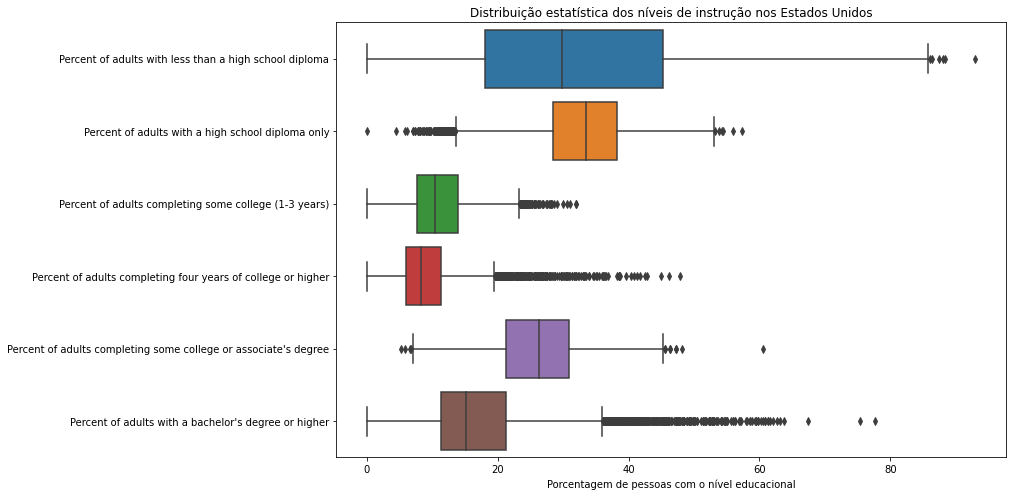

In [44]:
edu = educacao[(educacao.variavel == 'Percent of adults with less than a high school diploma') | 
                     (educacao.variavel == 'Percent of adults with a high school diploma only')|
       (educacao.variavel == 'Percent of adults completing some college (1-3 years)')|
       (educacao.variavel == 'Percent of adults completing four years of college or higher')|
       (educacao.variavel == "Percent of adults completing some college or associate's degree")|
       (educacao.variavel == "Percent of adults with a bachelor's degree or higher")]

fig, axs = plt.subplots(figsize=(12,8))
sns.boxplot(x='value',
           y='variavel',
           data=edu)
axs.set_xlabel('Porcentagem de pessoas com o nível educacional')
axs.set_ylabel("")
axs.set_title('Distribuição estatística dos níveis de instrução nos Estados Unidos')

plt.show()

In [45]:
# TODO: Descrever bem este gráfico

## Unindo as informações

Nesta seção iremos unir os dados sobre educação com os dados sobre o desemprego e verificar se existe alguma correlação entre o nível educacional dos Americanos com a taxa de desemprego.

In [46]:
ensino_medio_superior

,FIPS Code,State,Area name,City/Suburb/Town/Rural 2013,value,variavel,ano
16415,1007,AL,Bibb County,City,19.4,Percent of adults with a high school diploma only,1970
16416,1009,AL,Blount County,City,22.7,Percent of adults with a high school diploma only,1970
16417,1021,AL,Chilton County,City,20.0,Percent of adults with a high school diploma only,1970
16418,1073,AL,Jefferson County,City,28.7,Percent of adults with a high school diploma only,1970
16419,1115,AL,St. Clair County,City,23.6,Percent of adults with a high school diploma only,1970
...,...,...,...,...,...,...,...
131315,53000,WA,Washington,NaN,36.0,Percent of adults with a bachelor's degree or ...,2015
131316,54000,WV,West Virginia,NaN,20.6,Percent of adults with a bachelor's degree or ...,2015
131317,55000,WI,Wisconsin,NaN,30.1,Percent of adults with a bachelor's degree or ...,2015
131318,56000,WY,Wyoming,NaN,27.4,Percent of adults with a bachelor's degree or ...,2015


In [71]:
taxaDesemp = desemprego[desemprego.variavel=='taxaDesemprego']
taxaDesemp

,FIPS_Code,Area_name,State,City/Suburb/Town/Rural,value,variavel,ano
9825,1007,"Bibb County, AL",AL,City,5.4,taxaDesemprego,2000
9826,1009,"Blount County, AL",AL,City,3.5,taxaDesemprego,2000
9827,1021,"Chilton County, AL",AL,City,4.3,taxaDesemprego,2000
9828,1073,"Jefferson County, AL",AL,City,4.0,taxaDesemprego,2000
9829,1115,"St. Clair County, AL",AL,City,3.8,taxaDesemprego,2000
...,...,...,...,...,...,...,...
275094,51000,Virginia,VA,NaN,6.2,taxaDesemprego,2020
275095,53000,Washington,WA,NaN,8.4,taxaDesemprego,2020
275096,54000,West Virginia,WV,NaN,8.3,taxaDesemprego,2020
275097,55000,Wisconsin,WI,NaN,6.3,taxaDesemprego,2020


### Normalizando as variáveis

Para fazer uma comparação correta entre as taxas de desemprego e de nível de instrução, devemos realizar uma normalização das variáveis para que os valores fiquem entre 0 e 1. Para isso, podemos utilizar a função MinMaxScaler do Scitkit-learn.

In [50]:
from sklearn.preprocessing import MinMaxScaler

In [51]:
scaler = MinMaxScaler()

In [59]:
ensino_scaled = ensino_medio_superior.copy()
ensino_scaled['value'] = scaler.fit_transform(ensino_scaled['value'].values.reshape(-1,1))

In [60]:
ensino_scaled

,FIPS Code,State,Area name,City/Suburb/Town/Rural 2013,value,variavel,ano
16415,1007,AL,Bibb County,City,0.250000,Percent of adults with a high school diploma only,1970
16416,1009,AL,Blount County,City,0.292526,Percent of adults with a high school diploma only,1970
16417,1021,AL,Chilton County,City,0.257732,Percent of adults with a high school diploma only,1970
16418,1073,AL,Jefferson County,City,0.369845,Percent of adults with a high school diploma only,1970
16419,1115,AL,St. Clair County,City,0.304124,Percent of adults with a high school diploma only,1970
...,...,...,...,...,...,...,...
131315,53000,WA,Washington,NaN,0.463918,Percent of adults with a bachelor's degree or ...,2015
131316,54000,WV,West Virginia,NaN,0.265464,Percent of adults with a bachelor's degree or ...,2015
131317,55000,WI,Wisconsin,NaN,0.387887,Percent of adults with a bachelor's degree or ...,2015
131318,56000,WY,Wyoming,NaN,0.353093,Percent of adults with a bachelor's degree or ...,2015


In [69]:
taxaDesemp_scaled = taxaDesemp.copy()
taxaDesemp_scaled['value'] = scaler.fit_transform(taxaDesemp['value'].values.reshape(-1,1))

In [72]:
taxaDesemp_scaled

,FIPS_Code,Area_name,State,City/Suburb/Town/Rural,value,variavel,ano
9825,1007,"Bibb County, AL",AL,City,0.160839,taxaDesemprego,2000
9826,1009,"Blount County, AL",AL,City,0.094406,taxaDesemprego,2000
9827,1021,"Chilton County, AL",AL,City,0.122378,taxaDesemprego,2000
9828,1073,"Jefferson County, AL",AL,City,0.111888,taxaDesemprego,2000
9829,1115,"St. Clair County, AL",AL,City,0.104895,taxaDesemprego,2000
...,...,...,...,...,...,...,...
275094,51000,Virginia,VA,NaN,0.188811,taxaDesemprego,2020
275095,53000,Washington,WA,NaN,0.265734,taxaDesemprego,2020
275096,54000,West Virginia,WV,NaN,0.262238,taxaDesemprego,2020
275097,55000,Wisconsin,WI,NaN,0.192308,taxaDesemprego,2020


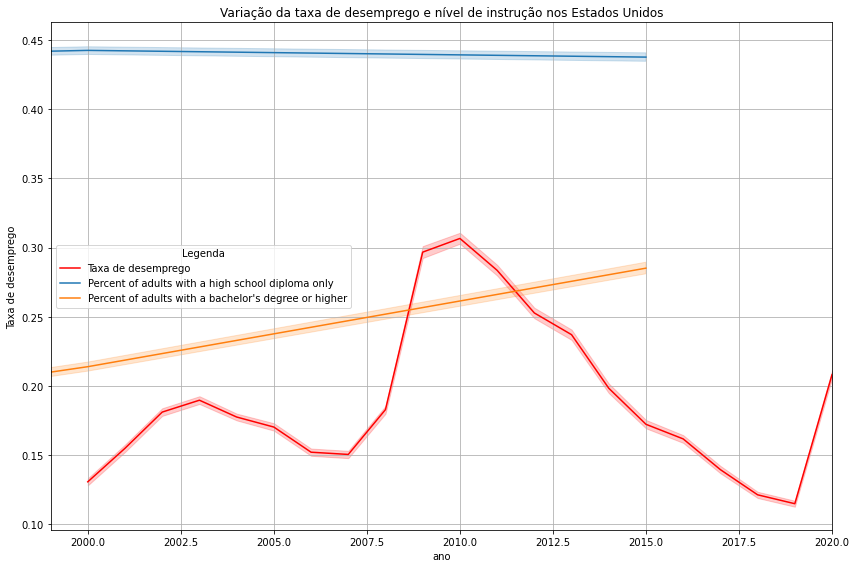

In [91]:
fig, axs = plt.subplots(figsize=(12,8))
sns.lineplot(data=taxaDesemp_scaled,
            x='ano',
            y='value',
            color='red',
            ax=axs,
            label='Taxa de desemprego')

axs.set_title('Variação da taxa de desemprego e nível de instrução nos Estados Unidos')
axs.set_xlabel('ano')
axs.set_ylabel('Taxa de desemprego')
axs.set_xlim(1999, 2020)
axs.grid()


sns.lineplot(data=ensino_scaled,
            x='ano',
            y='value',
            ax=axs,
            hue='variavel')

#axs[].set_title('Proporção dos níveis educacionais nos Estados Unidos')
#axs[1].set_xlabel('ano')
#axs[1].set_ylabel('Porcentagem da população total')

axs.legend(title="Legenda",
             loc='center left')
#axs[1].grid()

plt.tight_layout()
plt.show()

Como o crescente número de pessoas obtendo o grau de ensino médio completo, poderíamos inferir que a taxa de desemprego poderia cair, visto que existem mais pessoas intruídas no mercado. No entanto, o gráfico acima mostra o contrário: De início, a taxa de desemprego cresceu de forma abrupta durante o período até 2010, e, a partir daí, caiu também de forma  brusca e voltou a subir. Podemos concluir desta análise que apenas o nível de instrução da sociedade é insuficiente para tentar explicar o desemprego em um país. No entanto, o também é possível perceber que, conforme o número de pessoas com o grau de ensino superior ou maior cresceu, a taxa de desemprego caiu. Para obter uma explica mais acertiva sobre isto, devemos levar em consideração muitos outros fatores socioeconômicos.

## Conclusão


Nesta análise de dados vimos diversas formas de preprocessamento de dados: Transformação de colunas em linhas, mudança de tipos de variáveis, expansão de uma coluna em várias a partir da separação de strings, normalização de valores, entre outros. Como resultado, vimos que a taxa de desemprego de um país é uma variável bem complexa, pois ela não é facilmente explicada com dados como crescimento populacional e nível de instrução. Vimos também que a porcentagem de pessoas, nos Estados Unidos, que possuem apenas ensino médio vem decrescendo com o tempo, e a porcentagem de pessoas que possui ensino superior vem crescendo de forma quase linear. E, um detalhe importante, é que este nível de instrução não só está melhorando nas capitais e grandes centros urbanos, como também está melhorando nos centros rurais. 

Estas porcentagem apresentaram grande variabilidade, podendo variar bastante de estado para estado, como visto no boxplot dos níveis de instrução.

Finalizamos com a última figura, vimos que exite uma possível relação entre o número de pessoas com ensino superior e a taxa de desemprego, mas esta relação deve ser investigada mais afundo com a utilização de mais dados.